In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/tree_regression_example01.xlsx')
df

,X1,X2,Y
0,2,1.0,10
1,3,1.5,10
2,4,2.0,12
3,5,3.0,18


[Text(0.6, 0.8333333333333334, 'x[0] <= 4.5\nsquared_error = 10.75\nsamples = 4\nvalue = 12.5'),
 Text(0.4, 0.5, 'x[0] <= 3.5\nsquared_error = 0.889\nsamples = 3\nvalue = 10.667'),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = 10.0'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 12.0'),
 Text(0.8, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 18.0')]

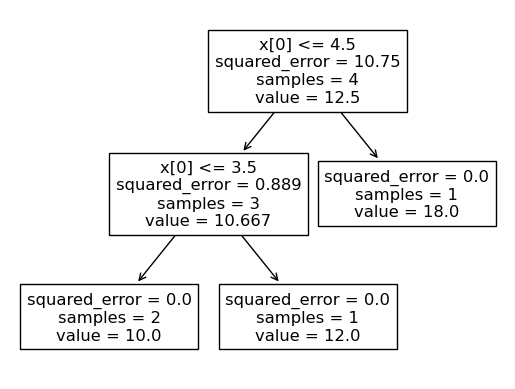

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

X = df.drop('Y', axis=1)
y = df['Y']

tree = DecisionTreeRegressor()

tree.fit(X, y)

plot_tree(tree)

In [ ]:
ybar = np.mean([10, 10, 12])
print(ybar)
(1/3)*((10-ybar)**2 + (10-ybar)**2 + (12-ybar)**2)

10.666666666666666


0.888888888888889

In [ ]:
(3/4)*(1/3)*((10-ybar)**2 + (12-ybar)**2 + (18-ybar)**2)

8.666666666666666

# Classification Trees - Bank marketing



In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('/content/bank_mark_campaign.csv', sep=';')

df = df.replace('unknown', np.nan) 

col_nan = df.columns[df.isna().any(axis=0)].to_list()
col_num = df.describe().columns.to_list()
df.columns.difference(col_nan + col_num)
col_cat = df.columns.difference(col_nan + col_num + ['y']).to_list()

na_treat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oneh', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer([
    ('na_tr', na_treat, col_nan),
    ('cat_tr', OneHotEncoder(drop='first'), col_cat),
    ('scale_tr', StandardScaler(), col_num)], 
    remainder='passthrough')

pipe = Pipeline([
    ('pre', preprocessor),
    # ('gnb', GaussianNB())])
    ('tree', DecisionTreeClassifier())])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_train)

acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')


Accuracy= 1.0
[[ 3700     0]
 [    0 29250]]
Recall= 1.0


In [ ]:
y_pred = pipe.predict(X_test)

acur = accuracy_score(y_test, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_test, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_test, y_pred, pos_label='yes')
print(f'Recall= {recall}')

Accuracy= 0.8826171400825443
[[ 485  455]
 [ 512 6786]]
Recall= 0.5159574468085106


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('/content/bank_mark_campaign.csv', sep=';')

df = df.replace('unknown', np.nan) 

col_nan = df.columns[df.isna().any(axis=0)].to_list()
col_num = df.describe().columns.to_list()
df.columns.difference(col_nan + col_num)
col_cat = df.columns.difference(col_nan + col_num + ['y']).to_list()

na_treat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oneh', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer([
    ('na_tr', na_treat, col_nan),
    ('cat_tr', OneHotEncoder(drop='first'), col_cat),
    ('scale_tr', StandardScaler(), col_num)], 
    remainder='passthrough')

hyper = {
    'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
}

pipe = Pipeline([
    ('pre', preprocessor),
    # ('gnb', GaussianNB())])
    ('grid', GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), hyper, cv=5, scoring='roc_auc'))])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_train)

acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')


Accuracy= 0.8336874051593324
[[ 3519   181]
 [ 5299 23951]]
Recall= 0.951081081081081


In [ ]:
1928/(1772+1928)

0.5210810810810811

In [ ]:
y_pred = pipe.predict(X_test)

acur = accuracy_score(y_test, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_test, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_test, y_pred, pos_label='yes')
print(f'Recall= {recall}')

Accuracy= 0.9129643117261471
[[ 493  447]
 [ 270 7028]]
Recall= 0.524468085106383


In [ ]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# Regression Trees - Car radios

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import datetime

df = pd.read_excel('/content/data_carradios.xlsx')

def get_ages(col):
  result = (datetime.datetime.now()-col).astype('<m8[Y]')
  result = pd.DataFrame(result)
  return result

ager = Pipeline([
    ('ages', FunctionTransformer(get_ages, feature_names_out='one-to-one')),
    ('scale', StandardScaler())
])

def get_weekdays(col):
  result = col.iloc[:,0].dt.weekday
  result = pd.DataFrame(result)
  return result

weeker = Pipeline([
    ('weekd', FunctionTransformer(get_weekdays, feature_names_out='one-to-one')),
    ('oneh', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('ages_tr', ager, ['bdate']),
    ('weekd_tr', weeker, ['datep']),
    ('team_tr', OneHotEncoder(drop='first'), ['team']),
    ('scaler', StandardScaler(), ['prized', 'prizeq'])],
    remainder='passthrough')

X = df.drop('perc_defec', axis=1)
y = df['perc_defec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe = Pipeline([
    ('pre', preprocessor),
    ('tree', DecisionTreeRegressor())])

pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_train)

r2 = r2_score(y_train, y_pred)
print(f'R2= {r2}')

mae = mean_absolute_error(y_train, y_pred)
print(f'MAE= {mae}')

rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f'RMSE= {rmse}')


In [ ]:
y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R2= {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE= {mae}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE= {rmse}')
